In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from utillities_Q1_op2 import *
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Into" data-toc-modified-id="Into-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Into</a></span></li><li><span><a href="#Load-and-set-the-data" data-toc-modified-id="Load-and-set-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and set the data</a></span></li><li><span><a href="#Plot-a-sample-Digits" data-toc-modified-id="Plot-a-sample-Digits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot a sample Digits</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SVM</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Metrics</a></span></li></ul></li><li><span><a href="#Simple-Fully-connected-NN-with-one-layer" data-toc-modified-id="Simple-Fully-connected-NN-with-one-layer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple Fully connected NN with one layer</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Metrics</a></span></li></ul></li><li><span><a href="#CNN" data-toc-modified-id="CNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CNN</a></span><ul class="toc-item"><li><span><a href="#Model-Graph" data-toc-modified-id="Model-Graph-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Model Graph</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Metrics</a></span></li></ul></li></ul></div>

## Into

In order to predict the MNIST data set i will try 3 different methods:
* SVM - One Vs All classification
* NN - Small network with 1 big hiddend layer
* CNN - Still a small network but with conv layers, pooling and dropout layers

As you can see the test is not used for model selection so it is unseen data

## Load and set the data

In [2]:
# load in the data
train, test = load_and_set_data()

# set train and test vectors
x_train, x_test, y_train, y_test = set_train_test(train, test)

X Train data Shape: (524, 256)
X Test data Shape: (1945, 256)
Y Train data Shape: (524,)
Y Test data Shape: (1945,)


## Plot a sample Digits

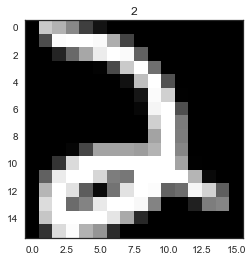

In [3]:
#plot some numbers
plot_some_number(train.drop(train.columns[0], axis=1), train[0], ind_list=[1])

## SVM

### Train

In [4]:
clf = SVC()
clf.fit(train.drop(train.columns[0], axis=1), train[0])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Metrics

In [5]:
final_acc_train_svm = clf.score(train.drop(train.columns[0], axis=1), train[0])
print("Final accuracy on Train: {}".format(final_acc_train_svm))

final_acc_test_svm = clf.score(test.drop(test.columns[0], axis=1), test[0])
print("Final accuracy on Test: {}".format(final_acc_test_svm))

Final accuracy on Train: 0.9751908396946565
Final accuracy on Test: 0.9681233933161953


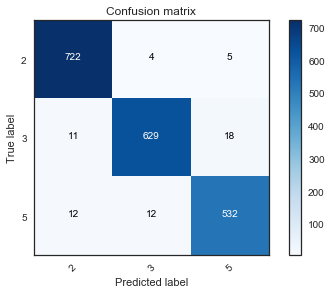

In [6]:
# Predict the values from the validation dataset
Y_pred = clf.predict(test.drop(train.columns[0], axis=1))
# compute the confusion matrix
confusion_mtx = confusion_matrix(test[0], Y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = [2,3,5]) 

## Simple Fully connected NN with one layer

### Train

In [7]:
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(3500,), solver='lbfgs', random_state=18)
clf.fit(train.drop(train.columns[0], axis=1), train[0])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=18, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Metrics

In [8]:
final_acc_train_nn = clf.score(train.drop(train.columns[0], axis=1), train[0])
print("Final accuracy on Train: {}".format(final_acc_train_nn))

final_acc_test_nn = clf.score(test.drop(test.columns[0], axis=1), test[0])
print("Final accuracy on Test: {}".format(final_acc_test_nn))

Final accuracy on Train: 1.0
Final accuracy on Test: 0.9455012853470437


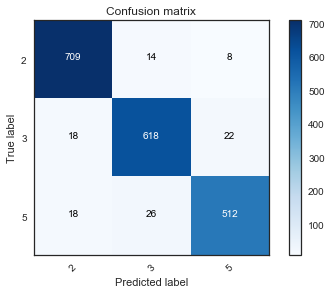

In [9]:
# Predict the values from the validation dataset
Y_pred = clf.predict(test.drop(train.columns[0], axis=1))
# compute the confusion matrix
confusion_mtx = confusion_matrix(test[0], Y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = [2,3,5]) 

## CNN

### Model Graph

In [10]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (16,16,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

In [11]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [12]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
epochs = 20
batch_size = 86

# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [15]:
# Fit the model
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/20
 - 4s - loss: 1.0866 - acc: 0.4612 - val_loss: 0.8593 - val_acc: 0.4761
Epoch 2/20
 - 3s - loss: 0.9813 - acc: 0.5494 - val_loss: 0.5998 - val_acc: 0.7414
Epoch 3/20
 - 3s - loss: 0.6494 - acc: 0.7609 - val_loss: 0.2399 - val_acc: 0.9568
Epoch 4/20
 - 3s - loss: 0.4785 - acc: 0.8081 - val_loss: 0.1900 - val_acc: 0.9548
Epoch 5/20
 - 3s - loss: 0.4264 - acc: 0.8387 - val_loss: 0.1321 - val_acc: 0.9692
Epoch 6/20
 - 3s - loss: 0.3620 - acc: 0.8725 - val_loss: 0.1230 - val_acc: 0.9717
Epoch 7/20
 - 3s - loss: 0.3369 - acc: 0.8765 - val_loss: 0.1024 - val_acc: 0.9784
Epoch 8/20
 - 3s - loss: 0.3223 - acc: 0.8805 - val_loss: 0.0780 - val_acc: 0.9763
Epoch 9/20
 - 4s - loss: 0.2474 - acc: 0.9167 - val_loss: 0.0792 - val_acc: 0.9758
Epoch 10/20
 - 3s - loss: 0.3487 - acc: 0.8808 - val_loss: 0.0590 - val_acc: 0.9882
Epoch 11/20
 - 3s - loss: 0.2060 - acc: 0.9383 - val_loss: 0.0557 - val_acc: 0.9882
Epoch 12/20
 - 4s - loss: 0.2046 - acc: 0.9341 - val_loss: 0.0523 - val_acc: 0.9882
E

### Metrics

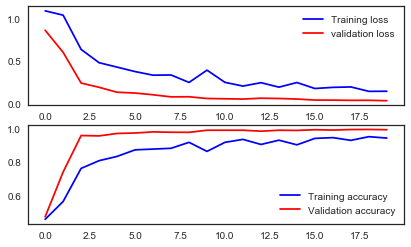

In [16]:
# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1)
plt.figure(figsize=(28,15))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

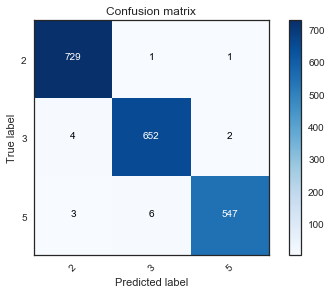

In [17]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = [2,3,5]) 

In [18]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

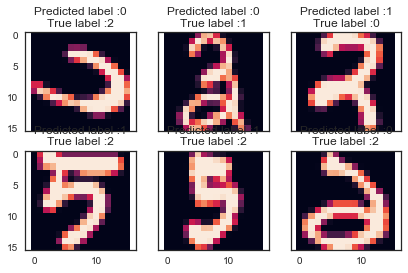

In [19]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)